In [1]:
#importing Required library 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder


sns.set()

In [2]:
#importing the datase 
df=pd.read_csv(r"C:\Users\Sagar Suraj Shirke\housing.csv")
df.head(10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
5,-122.25,37.85,52,919,213.0,413,193,4.0368,NEAR BAY,269700
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,NEAR BAY,299200
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,NEAR BAY,241400
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,NEAR BAY,226700
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,NEAR BAY,261100


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


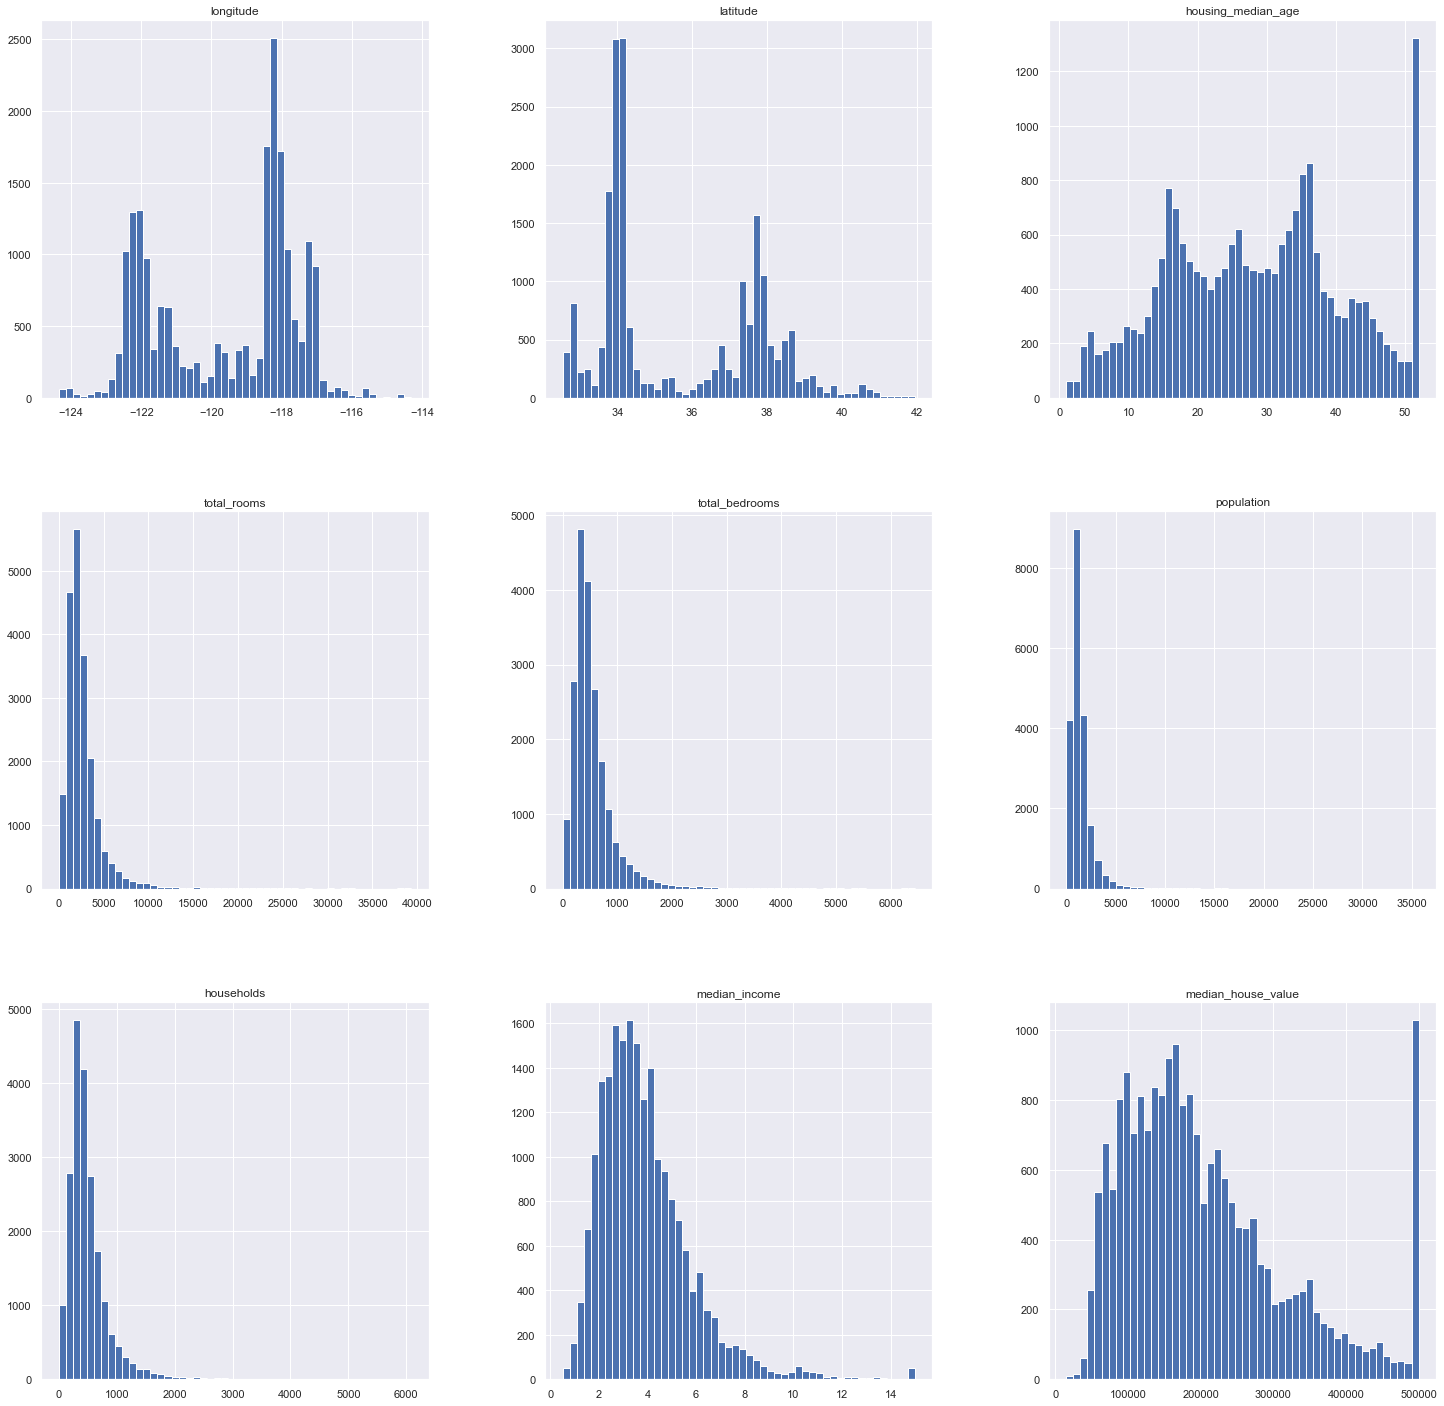

In [4]:
# let's see how data is distributed for every column
df.hist(figsize=(25,25),bins=50);


<AxesSubplot:>

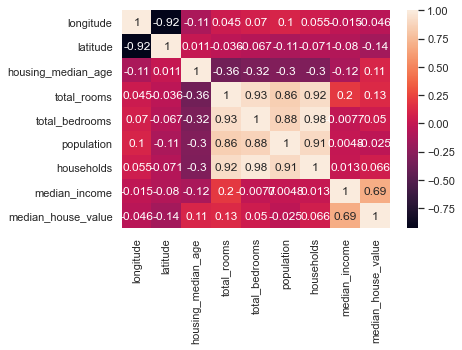

In [5]:
sns.heatmap(df.corr(), annot= True)

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

<AxesSubplot:>

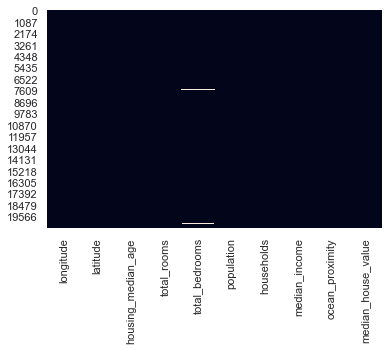

In [8]:
sns.heatmap(df.isnull(), cbar=False)

In [9]:
print(df["total_bedrooms"].describe())


count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64


In [10]:
df["total_bedrooms"].replace(np.NaN,df["total_bedrooms"].mean(),inplace= True)

In [11]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [12]:
labelEncoder = LabelEncoder()
print(df["ocean_proximity"].value_counts())
df["ocean_proximity"] = labelEncoder.fit_transform(df["ocean_proximity"])
df["ocean_proximity"].value_counts()
df.describe()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,1.165843,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,1.420662,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,0.000000,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,0.000000,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,1.000000,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,1.000000,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,4.000000,500001.000000


In [13]:
y = df['median_house_value'] #predict / dependent variable 
X =df.drop(columns = ['median_house_value']) #independent variables 

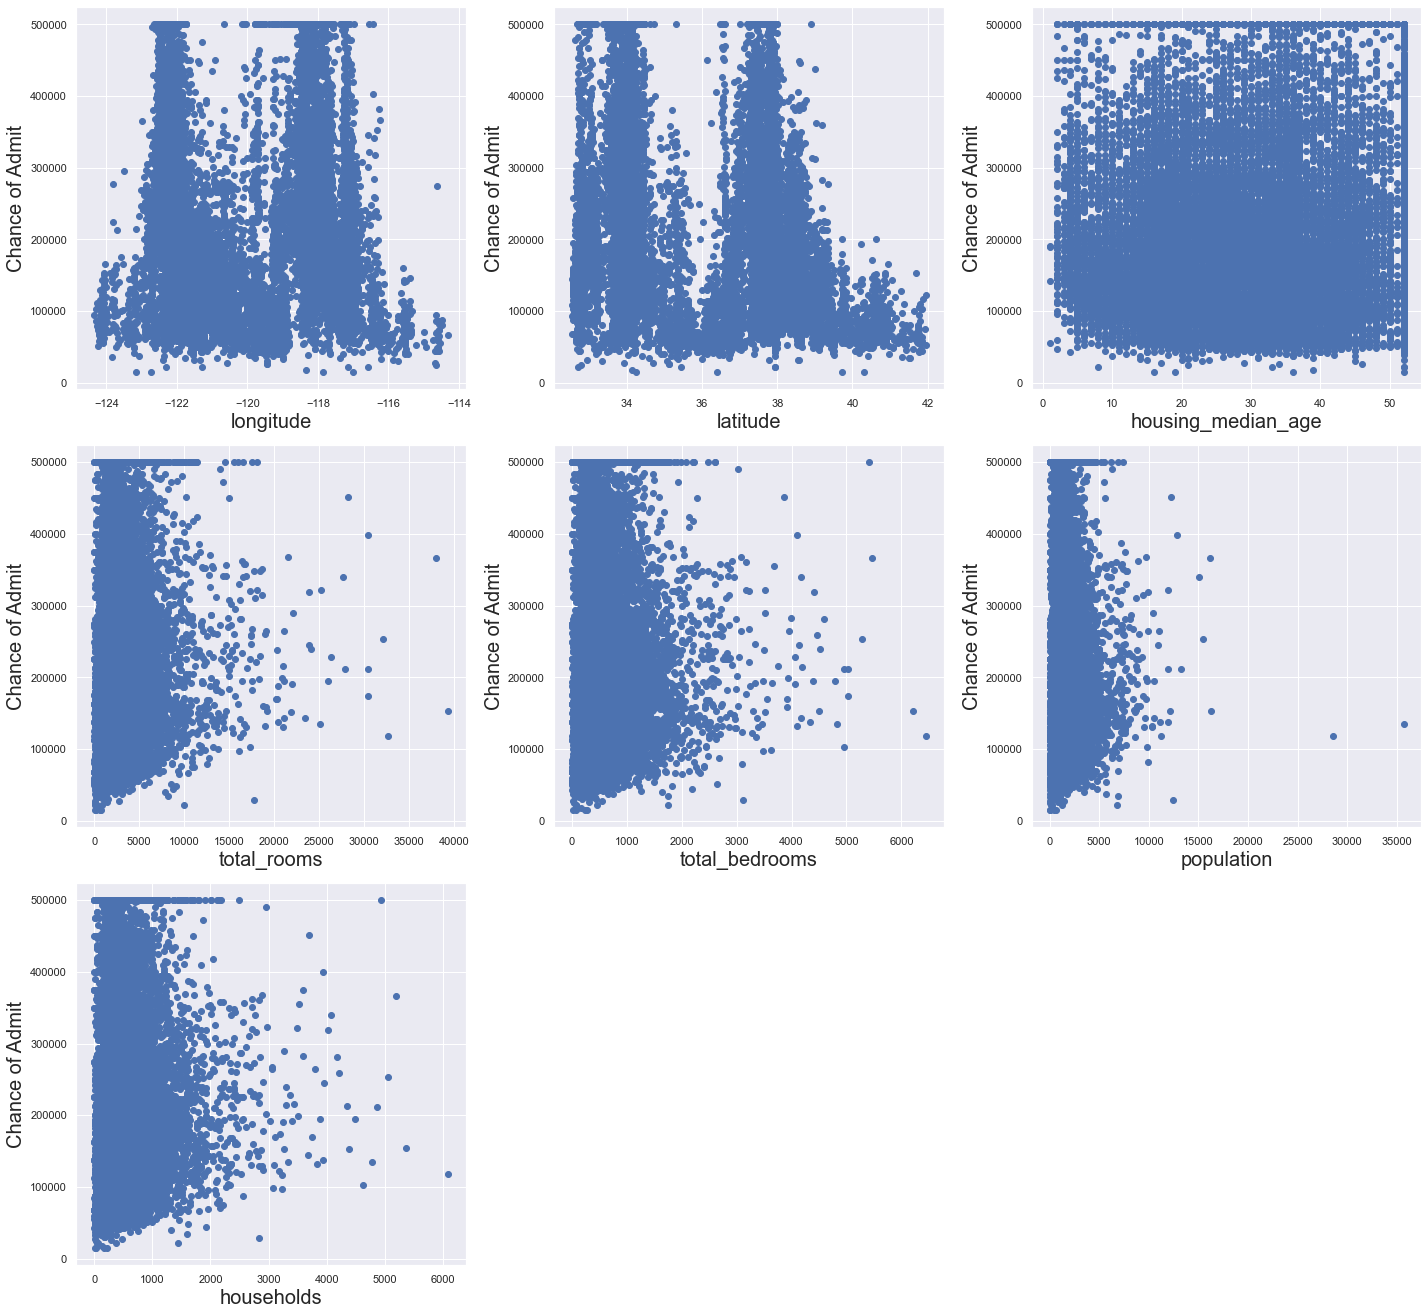

In [14]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=7 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Chance of Admit',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [15]:
scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)

In [16]:
X_scaled

array([[-1.32783522,  1.05254828,  0.98214266, ..., -0.97703285,
         2.34476576,  1.2910888 ],
       [-1.32284391,  1.04318455, -0.60701891, ...,  1.66996103,
         2.33223796,  1.2910888 ],
       [-1.33282653,  1.03850269,  1.85618152, ..., -0.84363692,
         1.7826994 ,  1.2910888 ],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.17404163,
        -1.14259331, -0.11673923],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.39375258,
        -1.05458292, -0.11673923],
       [-0.83369581,  1.75014627, -1.00430931, ...,  0.07967221,
        -0.78012947, -0.11673923]])

In [17]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state=355)

In [18]:
regression = LinearRegression()

regression.fit(x_train,y_train)

LinearRegression()

In [19]:
regression.score(x_train,y_train)

0.6309640094327986

In [20]:
regression.score(x_test,y_test)

0.6487252913354012

In [21]:
#predict on the test data
predy = regression.predict(x_test)

In [22]:
print(len(predy))
print(len(y_test))
print(predy[0:5])
print(y_test[0:5])

5160
5160
[253863.56137588 240357.16106451 149096.0418004  247134.83790778
 265936.72628222]
20413    212800
10186    185200
12356    301600
15644    225000
3450     235600
Name: median_house_value, dtype: int64


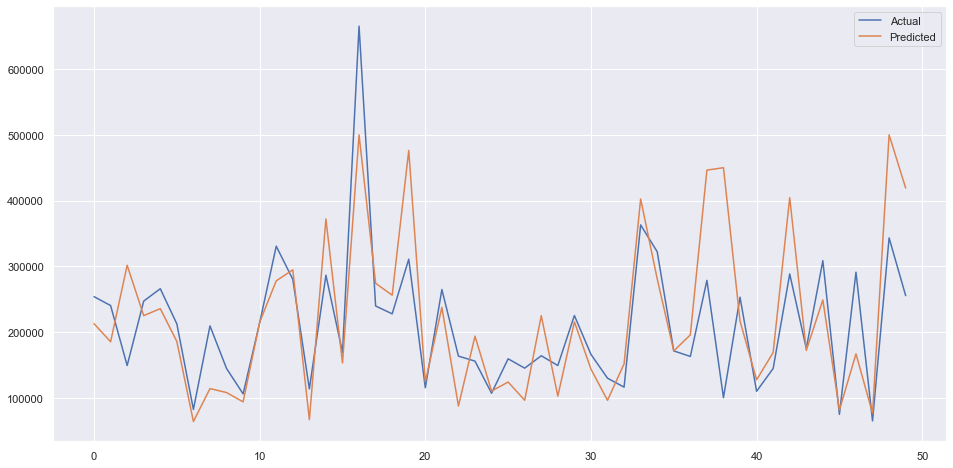

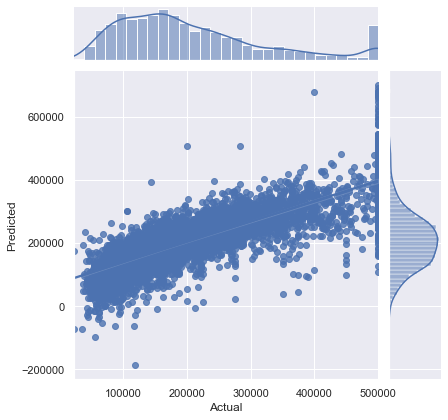

In [23]:
test = pd.DataFrame({'Predicted':predy,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

In [24]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [25]:
rmse=sqrt(mean_squared_error(y_test,predy))

In [26]:
rmse

68542.59848303783